### Module Import

In [23]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [24]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [25]:
word_index = imdb.get_word_index()

In [26]:
index_word = {idx+3: word for word, idx in word_index.items()}

In [27]:
index_word[1] = '<START>'
index_word[2] = '<UNKNOWN>'

In [28]:
' '.join(index_word[i] for i in x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [29]:
NUM_WORDS = max(index_word) + 1

In [30]:
texts = []
for data in x_train:
    text = ' '.join(index_word[i] for i in data)
    texts.append(text)

In [31]:
from keras.preprocessing.text import Tokenizer

In [32]:
tok = Tokenizer()
tok.fit_on_texts(texts)
new_data = tok.texts_to_sequences(texts)
new_data[0][:20]

[28,
 11,
 19,
 13,
 41,
 526,
 968,
 1618,
 1381,
 63,
 455,
 4449,
 64,
 3930,
 1,
 171,
 34,
 254,
 2,
 22]

In [33]:
from keras.preprocessing.sequence import make_sampling_table, skipgrams

In [34]:
vocab_size = len(tok.word_index)
table = make_sampling_table(vocab_size)
couples, labels = skipgrams(data,
                            vocab_size,
                            window_size=2,
                            sampling_table=table)

In [35]:
couples[:5]
labels[:5]

[0, 1, 0, 1, 0]

In [36]:
word_target, word_context = zip(*couples)

In [37]:
import numpy as np

In [38]:
word_target = np.array(word_target, dtype="int32")
word_context = np.array(word_context, dtype="int32")
labels = np.asarray(labels, dtype='int32')

In [39]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [40]:
embed_size=50

In [41]:
def word2vec():
  target_inputs = Input(shape=(1, ), dtype=('int32'))
  target_embedding = Embedding(vocab_size, embed_size)(target_inputs)

  context_inputs = Input(shape=(1, ), dtype=('int32'))
  context_embedding = Embedding(vocab_size, embed_size)(context_inputs)

  dot_product = Dot(axes=2)([target_embedding, context_embedding])
  dot_product = Reshape((1, ), input_shape=(1,1))(dot_product)
  output = Activation('sigmoid')(dot_product)

  model = Model(inputs=[target_inputs, context_inputs], outputs = output)

  model.compile(loss = 'binary_crossentropy',
                optimizer='adam')
  
  return model

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 50)        4429050     input_5[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 50)        4429050     input_6[0][0]                    
_______________________________________________________________________________________

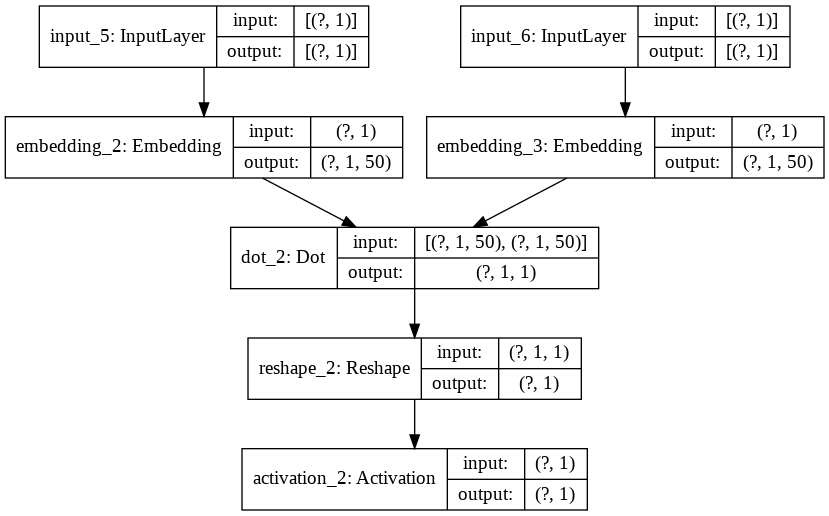

In [42]:
model = word2vec()
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)